## Fractals using TensorFlow

This is an example of using TensorFlow for something other than a neural network. In this case, to do a lot of calculations using complex numbers.  This notebook is an adaptation and expansion of the [TensorFlow documentation](https://www.tensorflow.org/tutorials/ ) with additional mathematical formulas taken from [Wolfram](http://mathworld.wolfram.com/MandelbrotSet.html )



In [275]:
# Import libraries for simulation
import tensorflow as tf
import numpy as np
import math

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import Image, display
tf.reset_default_graph()

In [289]:
def DisplayFractal(a, fmt='jpeg'):
  """Display an array of iteration counts as a
     colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([155-40*np.cos(a_cyclic),
                        1+20*np.sin(a_cyclic),
                        20+50*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

In [290]:
sess = tf.InteractiveSession()

In [291]:
# Use NumPy to create a 2D array of complex numbers

Y, X = np.mgrid[-1.25:1.25:0.005, -2:1:0.005]
Z = X+1j*Y

In [292]:
xs = tf.constant(Z.astype(np.complex64))
zs = tf.Variable(xs)
ns = tf.Variable(tf.zeros_like(xs, tf.float32))

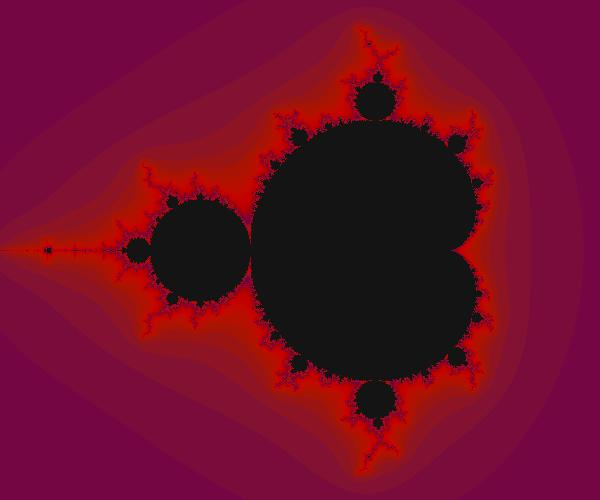

In [293]:
tf.global_variables_initializer().run()
# Compute the new values of z: z^2 + x
#zs_ = zs*zs + xs
#zs_ = zs*zs*zs + xs/(zs*2)
zs_ = zs**2 + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )
for i in range(100): step.run()
DisplayFractal(ns.eval())

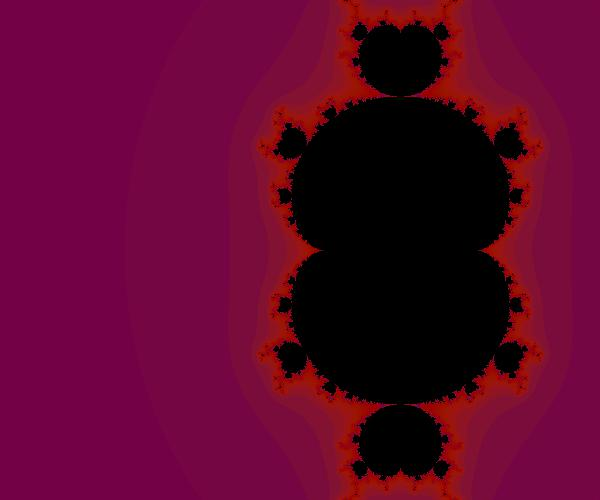

In [288]:
tf.global_variables_initializer().run()
# Compute the new values of z: z^2 + x
#zs_ = zs*zs + xs
#zs_ = zs*zs*zs + xs/(zs*2)
zs_ = zs**3 + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )
for i in range(100): step.run()
DisplayFractal(ns.eval())

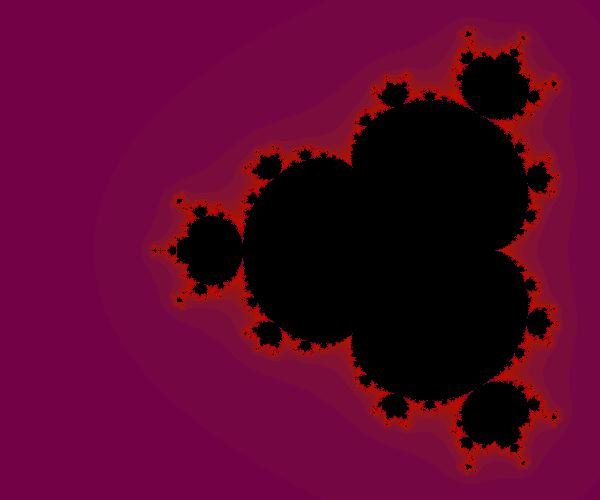

In [282]:
tf.global_variables_initializer().run()
# Compute the new values of z: z^2 + x
#zs_ = zs*zs + xs
#zs_ = zs*zs*zs + xs/(zs*2)
zs_ = zs**4 + xs

# Have we diverged with this new value?
not_diverged = tf.abs(zs_) < 4

# Operation to update the zs and the iteration count.
#
# Note: We keep computing zs after they diverge! This
#       is very wasteful! There are better, if a little
#       less simple, ways to do this.
#
step = tf.group(
  zs.assign(zs_),
  ns.assign_add(tf.cast(not_diverged, tf.float32))
  )
for i in range(100): step.run()
DisplayFractal(ns.eval())